In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.drop(['Unnamed: 0','key'],axis = 1,inplace = True)

In [5]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors = "coerce")

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
def distance_transform(pickup_long,pickup_lat,dropoff_long,dropoff_lat):
    return np.sqrt((pickup_long-dropoff_long)**2 + (pickup_lat-dropoff_lat)**2) * 111

In [13]:
df["distance_km"] = distance_transform(df["pickup_longitude"],df["pickup_latitude"],df["dropoff_longitude"],df["dropoff_latitude"])

In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.680517
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.453416
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.895055
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.834652
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,5.664483


In [15]:
df["year"] = df.pickup_datetime.dt.year

In [16]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.680517,2015
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.453416,2009
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.895055,2009
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.834652,2009
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,5.664483,2014


In [17]:
df = df[df["fare_amount"] > 0]
df = df[df["fare_amount"] < 100]
df = df[df["distance_km"] < 60]
df = df[df["distance_km"] > 0]
df = df[df["passenger_count"] < 6]

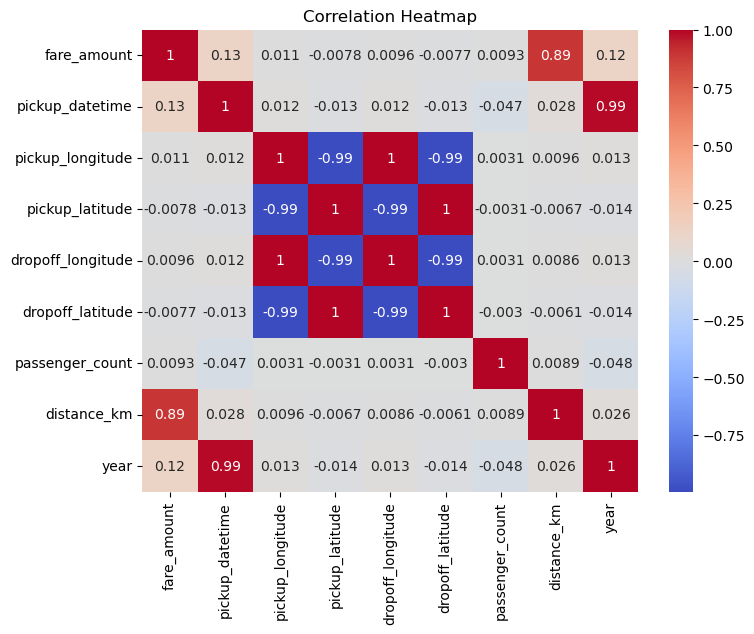

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True , cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
X = df[["year","distance_km"]]
y = df["fare_amount"]

In [20]:
X = df[["year","distance_km"]]
y = df["fare_amount"]

In [21]:
X.head()

,year,distance_km
0,2015,1.680517
1,2009,2.453416
2,2009,5.895055
3,2009,1.834652
4,2014,5.664483


In [22]:
y.head()

0     7.5
1     7.7
2    12.9
3     5.3
4    16.0
Name: fare_amount, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred_lr = lr.predict(X_test)

In [26]:
print("=> Linear Regression Results:")
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_lr))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print("R2:", metrics.r2_score(y_test, y_pred_lr))

=> Linear Regression Results:
MAE: 2.1397932111288234
MSE: 16.21995809828215
RMSE: 4.02740091104451
R2: 0.8161751603816214


In [27]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train , y_train)
y_pred_rf = rf.predict(X_test)

In [28]:
print("=> Linear Regression Results:")
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_rf))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print("R2:", metrics.r2_score(y_test, y_pred_rf))

=> Linear Regression Results:
MAE: 2.4065310071251114
MSE: 19.338570930125798
RMSE: 4.397564204207347
R2: 0.7808311416010679
